In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import PIL,pathlib
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import imutils

In [3]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/TARP project/dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

In [4]:
data_dir = pathlib.Path("/content/dataset")
yes = list(data_dir.glob('yes/*'))
img_pil = PIL.Image.open(str(yes[15]))

width: 254 pixels
height: 325 pixels
channels: 3


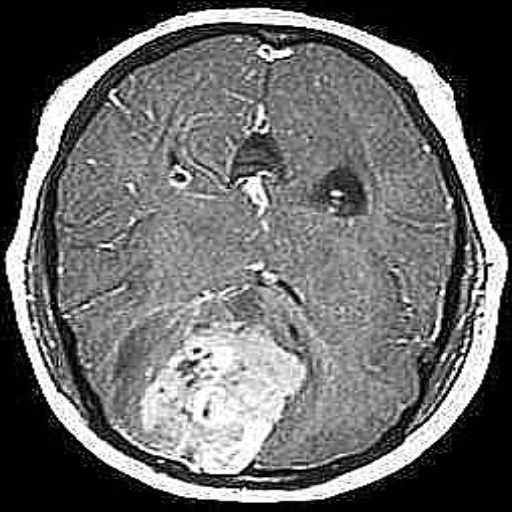

In [43]:
img_path = "/content/dataset/yes/y1003.jpg"    #1018,1023,1010,1007,1009
image = cv2.imread(img_path)
print("width: {} pixels".format(image.shape[1]))
print("height: {} pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))
dim=(512,512)
image=cv2.resize(image, dim)
cv2_imshow(image)

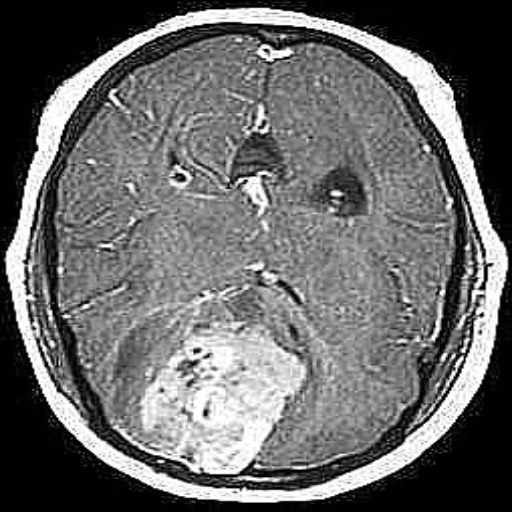

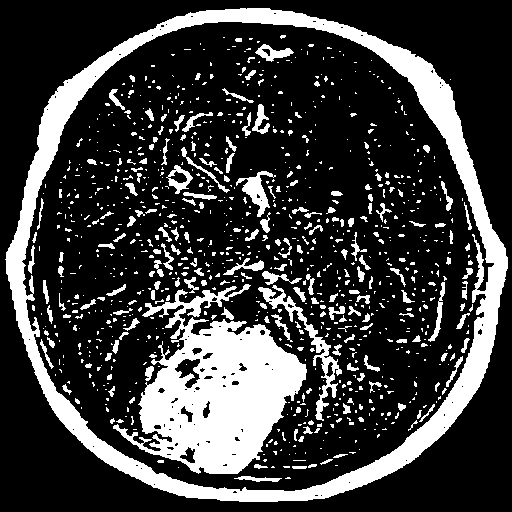

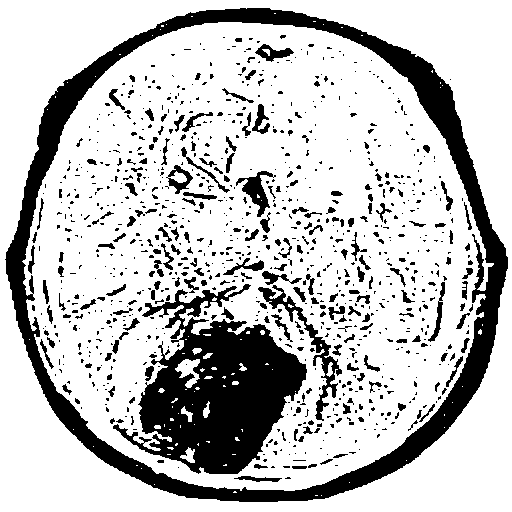

In [44]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY, 0.7)
cv2_imshow(gray)
(T, thresh) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)
(T, threshInv) = cv2.threshold(gray, 155, 255,cv2.THRESH_BINARY_INV)
cv2_imshow(threshInv)

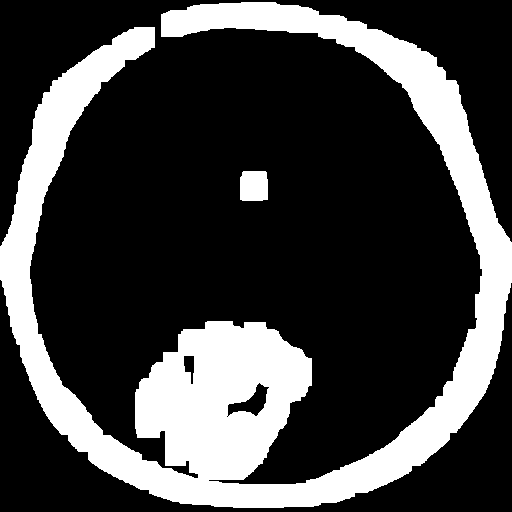

In [45]:
# noise removal
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
cv2_imshow(unknown)

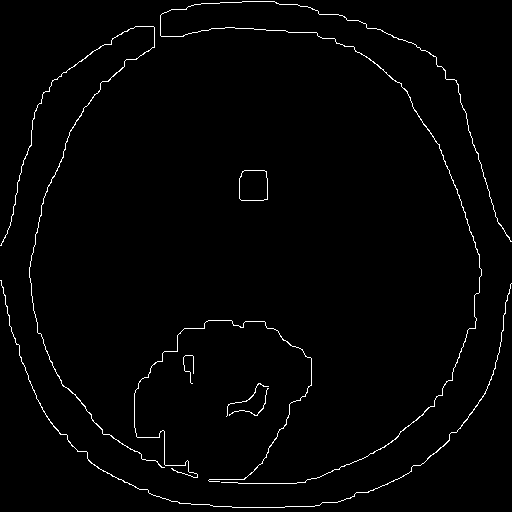

In [46]:
def auto_canny(image, sigma=0.10):
     #compute median of image thresholds
     v = np.median(image)

     #apply automatic canny edge detection using the computed median
     lower = int(max(0,(1.0 - sigma) * v))
     upper = int(min(255, (1.0 + sigma) * v))
     edged = cv2.Canny(image, lower, upper)

     #return the edged image
     return edged
canny = auto_canny(unknown)
cv2_imshow(canny)

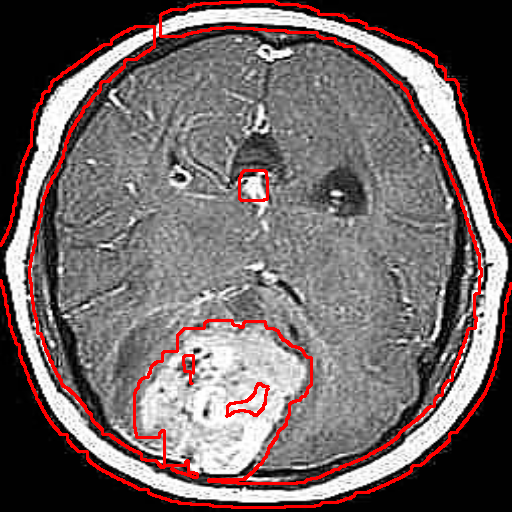

In [47]:
(cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, cnts, -1, (0, 0, 255), 2)
cv2_imshow(image)